In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Read Data
data = pd.read_csv(r'F:\board Infinity\Excel Study\Dashboards\globalterrorismdb_0718dist.csv',encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,02/07/1970,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,1,1,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,1,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,1,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,1,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# print all the columns names
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
# Rename the column name to understand it more clearly
data.rename(columns={'eventid':'EventId','iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country':'CountryCode','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'AttackTypes','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)

Text(0.5, 1.0, 'Count Of Perticular Type Of Attack Occured')

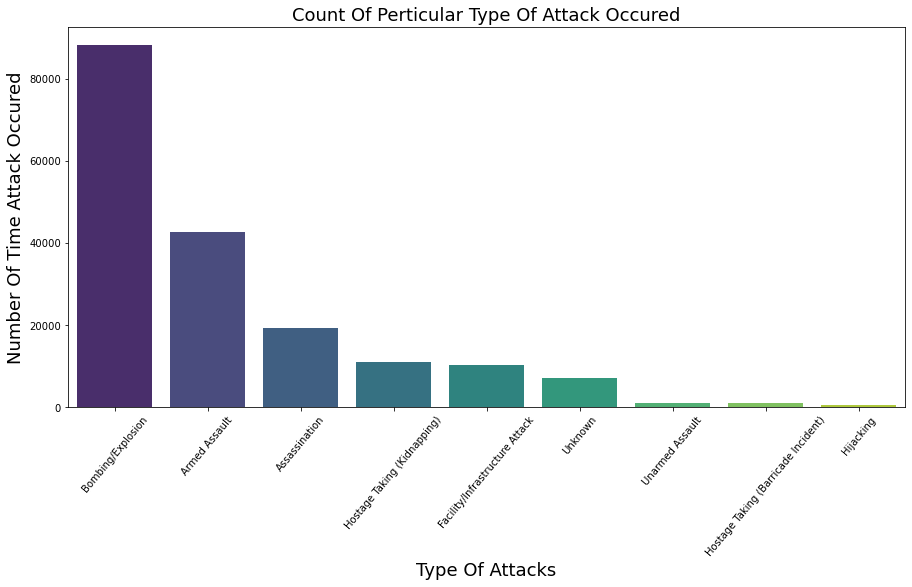

In [5]:
#Plot Count Of Perticular Type Of Attack Occured
plt.figure(figsize=(15,7))
sns.countplot('AttackTypes',data=data,order = data['AttackTypes'].value_counts().index,palette="viridis")
plt.xlabel('Type Of Attacks',fontsize=18)
plt.ylabel('Number Of Time Attack Occured',fontsize=18)
plt.xticks(rotation=50)
plt.title("Count Of Perticular Type Of Attack Occured",fontsize=18)

Text(0.5, 1.0, 'Most affected countries')

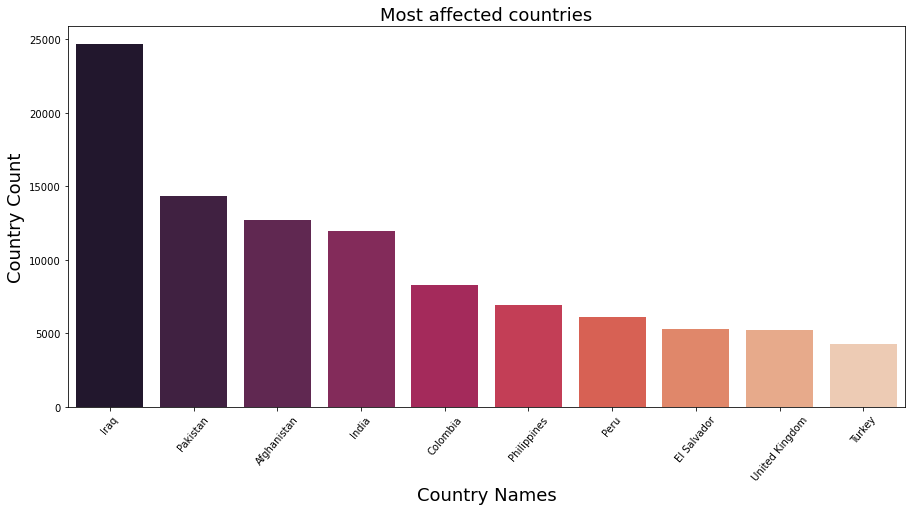

In [6]:
#Most affected countries due to attack
plt.figure(figsize=(15,7))
sns.countplot('Country',data=data,order = data['Country'].value_counts().iloc[:10].index,palette="rocket")
plt.xlabel('Country Names',fontsize=18)
plt.ylabel('Country Count',fontsize=18)
plt.xticks(rotation=50)
plt.title("Most affected countries",fontsize=18)

Text(0.5, 1.0, 'Top 10 Attacking Groups')

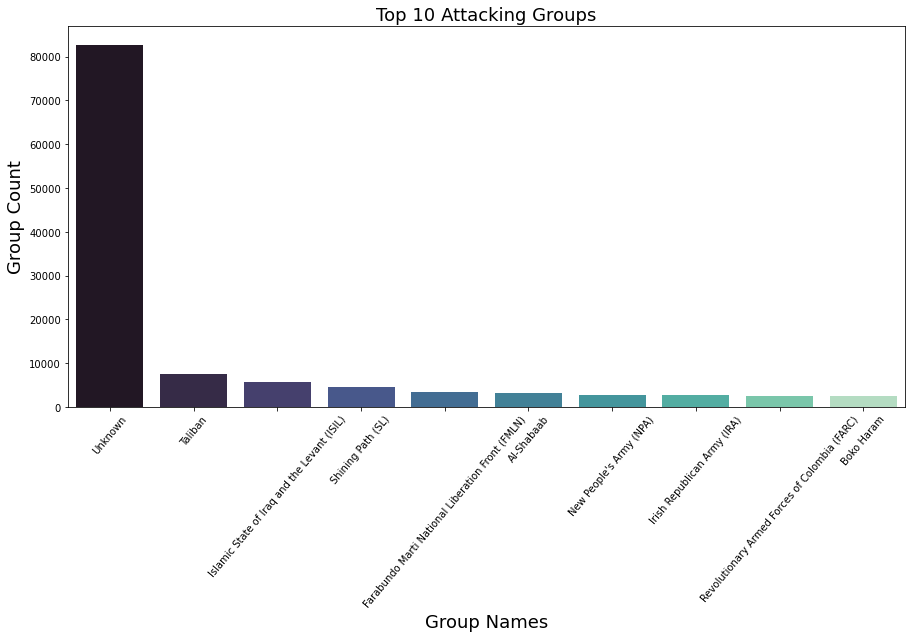

In [7]:
# Top 10 Attacking Groups  
plt.figure(figsize=(15,7))
sns.countplot('Group',data=data,order = data['Group'].value_counts().iloc[:10].index,palette="mako")
plt.xlabel('Group Names',fontsize=18)
plt.ylabel('Group Count',fontsize=18)
plt.xticks(rotation=50)
plt.title("Top 10 Attacking Groups",fontsize=18)

In [8]:
# Number Of People Killed By Attack Type
typeKill = data.pivot_table(columns='AttackTypes', values='Kill', aggfunc='sum')
typeKill

AttackTypes,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [10]:
# Number Of People Killed Accoss Countries Due To Attack
countryKill = data.pivot_table(columns='Country', values='Kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


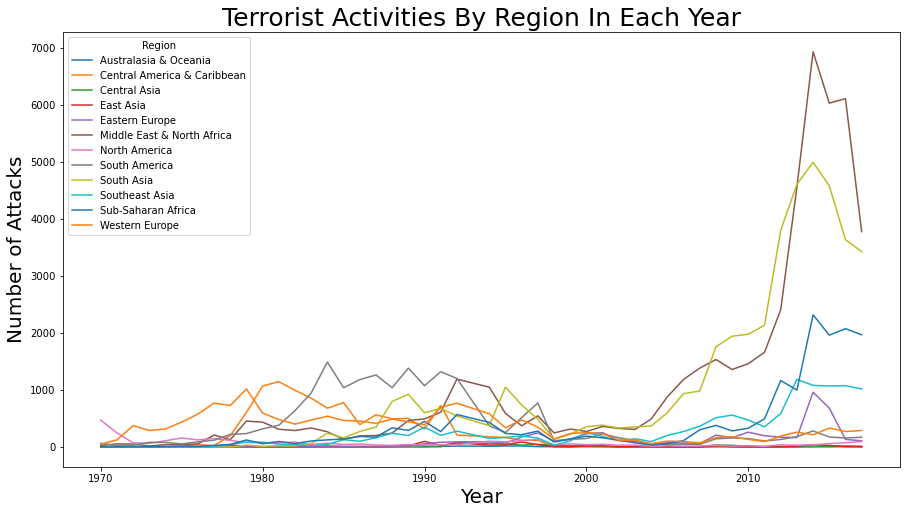

In [11]:
# Terrorist Activities By Region In Each Year
pd.crosstab(data.Year, data.Region).plot(kind='line',figsize=(15,8))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

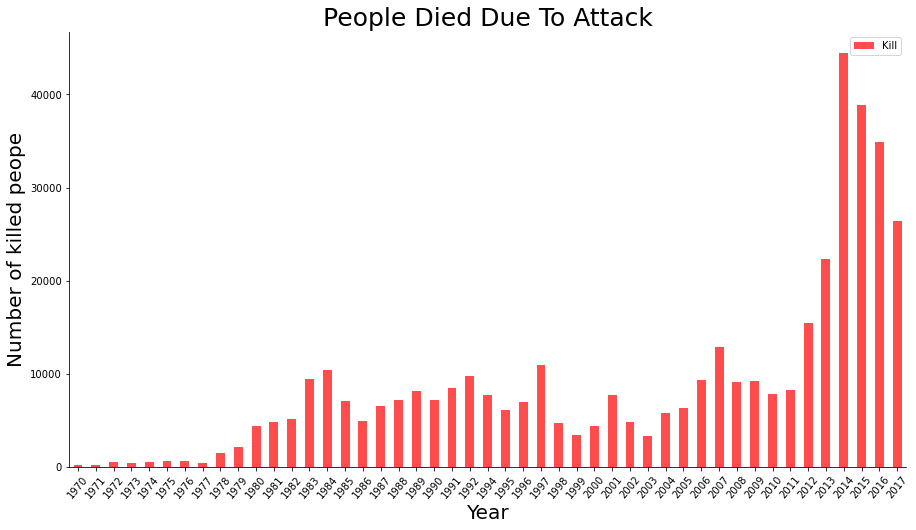

In [12]:
# People Died Due To Attack By Year
df = data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(15,8))
df.plot(kind='bar',alpha=0.7,ax=ax4,color='r')
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

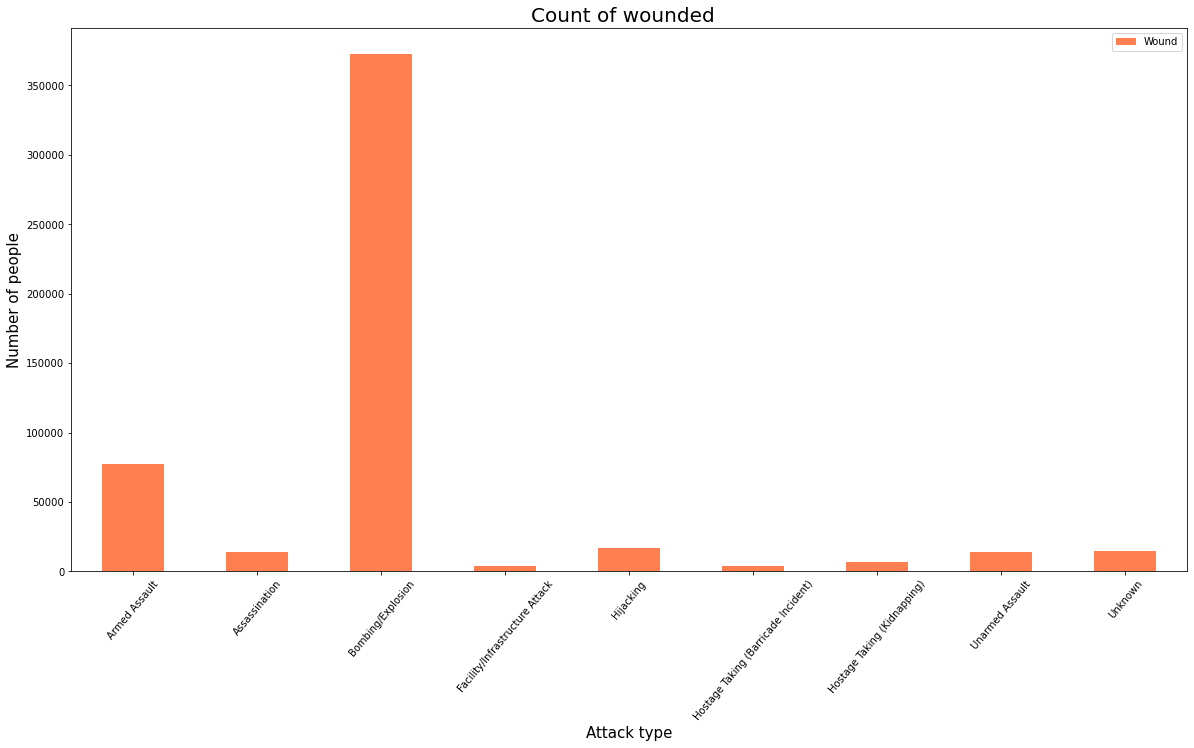

In [13]:
#Count of wounded
data[['AttackTypes','Wound']].groupby(["AttackTypes"],axis=0).sum().plot(kind='bar',figsize=(20,10),color='coral')
plt.xticks(rotation=50)
plt.title("Count of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()